In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import comb
from scipy.stats import binom

### Calculate the mean, median, mode and standard deviation

##### Problem Statement 1:

    The marks awarded for an assignment set for a Year 8 class of 20 students were as
    follows:   [  6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8  ]

In [2]:
data = pd.DataFrame('6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8'.split(' '),columns=['Marks'], index=range(1,21))
data['Marks'] =  data['Marks'].astype(int)

Mean -> 6.85
Mode -> 7
Median -> 7.0
Standard deviation -> 1.6311119875071343


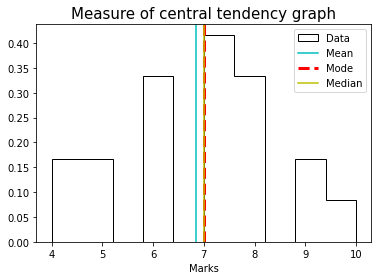

In [3]:
plt.hist(data, density=True, color='k', histtype = 'step', label='Data')
plt.axvline(data.mean().values[0], color='c', linestyle='-', label='Mean')
plt.axvline(data.mode().values[0], color='r', linestyle='--',linewidth=3, label='Mode')
plt.axvline(data.median().values[0], color='y', linestyle='-', label='Median')
#plt.axvline(data.std().values[0], color='g', linestyle='-', label='std')
plt.title("Measure of central tendency graph", size=15)
plt.xlabel("Marks")
plt.legend(loc='upper right')

print("Mean -> "+str(data.mean().values[0]),
      "Mode -> "+str(data.mode().values[0,0]),
      "Median -> "+str(data.median().values[0]),
      "Standard deviation -> "+str(data.std().values[0]),sep="\n")

##### Problem Statement 2:
    
    The number of calls from motorists per day for roadside service was recorded for a particular month:
        [  28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170, 100, 75, 104, 97, 75,
           123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109 ]

In [4]:
data1 = pd.DataFrame([28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170,
100, 75, 104, 97, 75, 123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109], columns=['No of calls'])

Mean -> 107.51428571428572
Mode -> 75
Median -> 100.0
Standard deviation -> 39.33892805484412


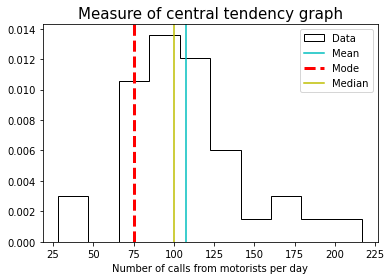

In [5]:
plt.hist(data1, density=True, color='k', histtype = 'step', label='Data')
plt.axvline(data1.mean().values[0], color='c', linestyle='-', label='Mean')
plt.axvline(data1.mode().values[0], color='r', linestyle='--',linewidth=3, label='Mode')
plt.axvline(data1.median().values[0], color='y', linestyle='-', label='Median')
#plt.axvline(data1.std().values[0], color='g', linestyle='-', label='std')
plt.title("Measure of central tendency graph",size=15)
plt.xlabel("Number of calls from motorists per day")
plt.legend(loc='upper right')

print("Mean -> "+str(data1.mean().values[0]),
      "Mode -> "+str(data1.mode().values[0,0]),
      "Median -> "+str(data1.median().values[0]),
      "Standard deviation -> "+str(data1.std().values[0]),sep="\n")

##### Problem Statement 3:

    The number of times I go to the gym in weekdays, are given below along with its associated probability:
        x = 0, 1, 2, 3, 4, 5
        f(x) = 0.09, 0.15, 0.40, 0.25, 0.10, 0.01
    Calculate the mean no. of workouts in a week. Also evaluate the variance involved in it.
    
   | No of times I go to gym in weekdays | ProbDistribution F(x) |
   | --- | --- |
   | 0 | 0.09 |
   | 1 | 0.15 |
   | 2 | 0.40 |
   | 3 | 0.25 |
   | 4 | 0.10 |
   | 5 | 0.01 |
   
   $$\text{Formula for mean is:} \sum_{i=1}^{n} x_{i}*f(x_{i})
   \\
   \text{Formula for variance is:} \sum_{i=1}^{n} (Mean - x_{i})^{2}*f(x_{i})
   $$

In [6]:
x = [0, 1, 2, 3, 4, 5]
fx = [0.09, 0.15, 0.40, 0.25, 0.10, 0.01]

In [7]:
data2 = pd.DataFrame({'Weekday':x,'Probability':fx})
mean_d2 = 0
for i in range(len(x)):
    mean_d2 = mean_d2 + (x[i]*fx[i])

var = 0
for i in range(len(x)):
    var = var + ((mean_d2-x[i])**2)*fx[i]

Mean -> 2.15
Variance -> 1.2275


c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'PDF graph with Mean and Variance'}, xlabel='Probability', ylabel='Density'>

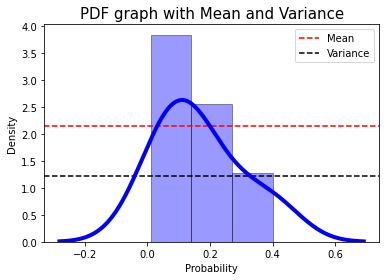

In [8]:
print("Mean -> "+str(mean_d2),
      "Variance -> "+str(var),sep="\n")
#plt.plot(x,fx)
plt.axhline(mean_d2, label='Mean', color='r', linestyle='--')
plt.axhline(var, label='Variance', color='k', linestyle='--')
plt.title("PDF graph with Mean and Variance", size=15)
plt.xlabel("Probability")
plt.legend()

sns.distplot(fx, color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

##### Problem Statement 4:

    Let the continuous random variable D denote the diameter of the hole drilled in an aluminum sheet. The target diameter 
    to be achieved is 12.5mm. Random disturbances in the process often result in inaccuracy. Historical data shows that the
    distribution of D can be modelled by the PDF (d) =20e−20(d−12.5), d ≥ 12.5. If a part with diameter > 12.6 mm needs to
    be scrapped,what is the proportion of those parts? What is the CDF when the diameter is of 11mm? What is your conclusion
    regarding the proportion of scraps?
    
    
**Answer:** <br>
> 1. For Part 1, to calculate the proportion for those parts with diameter > 12.6, we will follow below steps:  
>  -  Perform Integration on the PDF function to calculate the area under the curve.
\begin{equation}
P(X)= \int_{12.6}^{\infty} 20e^{-20(x-12.5)} dx = \left[-e^{-20(x-12.5)}\right]_{12.6}^{\infty}
\end{equation}
>  -  To calculate AUC from ∞ to 12.6 put the values in the above calculated formula
\begin{equation}
P(X>12.6) = [-e^{-20({\infty}-12.5)}] - [-e^{-20(12.6-12.5)}]
\\
 = [-e^{\infty}] - [-e^{-20(0.1)}]
\\
 = 0 - [-e^{-2}] = \textbf{0.135}
\end{equation}

> 2. For Part 2, the CDF will be 0 as the density function is only valid for values d >= 12.5.
> 3. Conclusion for proportion of scraps is:
\begin{equation}
  F(x)=\begin{cases}
    0, & \text{if $x<12.5$}.\\
    1-e^{-20(x-12.5)}, & \text{for x>=12.5}.
  \end{cases} 
  \\
  \text{where F(x) is P(12.5 < X < x)}
\end{equation}

In [14]:
def diameter_pdf(a):
    if a>12.49:
        return 20*np.exp(250-(20*a))
    else:
        return 0

def normalize_Data(aa):
    maxval = max(aa)
    minval = min(aa)
    
    return [(k-minval)/(maxval-minval) for k in aa]

Text(0.5, 1.0, 'Probability Density Function')

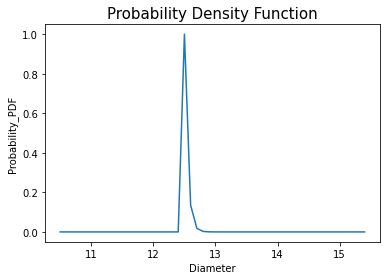

In [15]:
arr = np.arange(10.5,15.5,step=0.1)
d_pdf = [diameter_pdf(val) for val in arr]

newData = pd.DataFrame({'Diameter':arr,'Probability_PDF':normalize_Data(d_pdf)})

fig = plt.figure()
fig.subplots_adjust(hspace=1, wspace=2)
pdf = sns.lineplot(data = newData, x='Diameter',y='Probability_PDF')
pdf.set_title("Probability Density Function", fontdict={'fontsize': 15})

##### Problem Statement 5:
    A company manufactures LED bulbs with a faulty rate of 30%. If I randomly select 6 chosen LEDs, what is the probability
    of having 2 faulty LEDs in my sample? Calculate the average value of this process. Also evaluate the standard deviation
    associated with it.

**Part 1:What is the probability of having 2 faulty LEDs in my sample?
<br>Answer**:
$$\begin{equation} P(X) = {n \choose x}{p^x}{q^{n-x}} \end{equation}\\ 
\\
\text {where n = no of total events}
\\
\text{x = no of required events to occur}
\\
\text{p = probability of success}
\\
\text{q = probability of failure}
$$

Using the above formula we can calculate the probability of 2 faulty LEDs occurring.
$$\begin{equation} P(X) = {6 \choose 2}{ 0.3^ {(2)}}{0.7^{ (6-2)}}
\\
P(X) = {15 * 0.09 * 0.2401}
\\
P(X) = {0.324135}
\end{equation}
$$

**Part 2:Calculate the average value of this process. Also evaluate the standard deviation associated with it?
<br>Answer**:
The Mean and standard deviation are calculated using the below formulas:

$$\begin{equation}\text {Mean }(\mu) = {n*p} => {(6*0.3)} ==> {1.8}
\\
\text {Std }(\sigma) = {\sqrt{n*p*q}} => {\sqrt{6*0.3*0.7}} ==> {1.12249}
\end{equation}
$$

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='X', ylabel='Probability'>

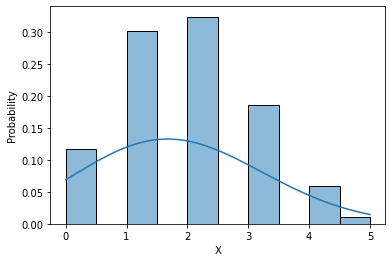

In [16]:
x1 = list(range(6))
fx1 = [comb(6,j)*(0.3**j)*(0.7**(6-j)) for j in x1] #fx is the list of probability of faulty LEDs in the choosen 6 bulbs

data3 = pd.DataFrame({'X':x1,'Probability of event occurring':fx1})
sns.histplot(data=data3,x='X',weights='Probability of event occurring', kde=True, stat='probability')

